In [2]:
from libero.libero.envs.objects import get_object_dict, get_object_fn

# Get a dictionary of all the objects
object_dict = get_object_dict()
print(object_dict.keys())

dict_keys(['alphabet_soup', 'bbq_sauce', 'butter', 'cherries', 'chocolate_pudding', 'cookies', 'corn', 'cream_cheese', 'ketchup', 'macaroni_and_cheese', 'mayo', 'milk', 'orange_juice', 'popcorn', 'salad_dressing', 'new_salad_dressing', 'tomato_sauce', 'rack', 'white_bowl', 'akita_black_bowl', 'plate', 'basket', 'chefmate_8_frypan', 'glazed_rim_porcelain_ramekin', 'microwave', 'slide_cabinet', 'window', 'faucet', 'basin_faucet', 'short_cabinet', 'short_fridge', 'wooden_cabinet', 'white_cabinet', 'flat_stove', 'wooden_tray', 'white_storage_box', 'wooden_shelf', 'wooden_two_layer_shelf', 'wine_rack', 'wine_bottle', 'dining_set_group', 'bowl_drainer', 'moka_pot', 'black_book', 'yellow_book', 'red_coffee_mug', 'desk_caddy', 'porcelain_mug', 'white_yellow_mug', 'target_zone'])


In [4]:
from libero.libero.envs.predicates import get_predicate_fn_dict, get_predicate_fn

predicate_dict = get_predicate_fn_dict()
print(predicate_dict.keys())


dict_keys(['true', 'false', 'in', 'on', 'up', 'printjointstate', 'open', 'close', 'turnon', 'turnoff'])


In [5]:
import numpy as np
from libero.libero.utils.bddl_generation_utils import get_xy_region_kwargs_list_from_regions_info
from libero.libero.utils.mu_utils import register_mu, InitialSceneTemplates
from libero.libero.utils.task_generation_utils import register_task_info, get_task_info, generate_bddl_from_task_info

@register_mu(scene_type="kitchen")
class KitchenScene(InitialSceneTemplates):
    def __init__(self):

        fixture_num_info = {
            "kitchen_table": 1,
            "wooden_cabinet": 1,
        }

        object_num_info = {
            "butter": 1,
            "plate": 1,
        }

        super().__init__(
            workspace_name="kitchen_table",
            fixture_num_info=fixture_num_info,
            object_num_info=object_num_info
        )

    def define_regions(self):
        self.regions.update(
            self.get_region_dict(region_centroid_xy=[0.0, -0.30],
                                 region_name="wooden_cabinet_init_region",
                                 target_name=self.workspace_name,
                                 region_half_len=0.01,
                                 yaw_rotation=(np.pi, np.pi))
        )

        self.regions.update(
            self.get_region_dict(region_centroid_xy=[0., 0.25], 
                                 region_name="butter_init_region", 
                                 target_name=self.workspace_name, 
                                 region_half_len=0.025)
        )

        self.regions.update(
            self.get_region_dict(region_centroid_xy=[0.0, 0.0], 
                                 region_name="plate_init_region", 
                                 target_name=self.workspace_name, 
                                 region_half_len=0.025)
        )
        self.xy_region_kwargs_list = get_xy_region_kwargs_list_from_regions_info(self.regions)

    @property
    def init_states(self):
        states = [
            ("On", "butter_1", "kitchen_table_butter_init_region"),
            ("On", "plate_1", "kitchen_table_plate_init_region"),
            ("On", "wooden_cabinet_1", "kitchen_table_wooden_cabinet_init_region"),
            ("Open", "wooden_cabinet_1_top_region")
        ]
        return states

In [7]:
scene_name = "kitchen_scene"
language = "put butter on the plate"
register_task_info(language,
                    scene_name=scene_name,
                    objects_of_interest=["butter_1", "plate_1"],
                    goal_states=[("In", "butter_1", "plate_1_top_region")]
)

scene_name = "kitchen_scene"
language = "put plate inside the wooden cabinet"
register_task_info(language,
                    scene_name=scene_name,
                    objects_of_interest=["wooden_cabinet_1", "plate_1"],
                    goal_states=[("In", "plate_1", "wooden_cabinet_1_bottom_region")]
)

scene_name = "kitchen_scene"
language = "put butter on the plate, put plate inside the wooden cabinet"
register_task_info(language,
                    scene_name=scene_name,
                    objects_of_interest=["butter_1", "wooden_cabinet_1", "plate_1"],
                    goal_states=[("In", "butter_1", "plate_1_top_region"), ("In", "plate_1", "wooden_cabinet_1_bottom_region")]
)

In [8]:
# This is the default path to store all the pddl scene files. Here we store the files in the temporary folder. If you want to directly add files into the libero codebase, get the default path use the following commented lines:
# from libero.libero import get_libero_path
# YOUR_BDDL_FILE_PATH = get_libero_path("bddl_files")

YOUR_BDDL_FILE_PATH = "tmp/pddl_files_yy"
bddl_file_names, failures = generate_bddl_from_task_info(folder=YOUR_BDDL_FILE_PATH)

print(bddl_file_names)

print("Encountered some failures: ", failures)


Succefully generated: 3
['tmp/pddl_files_yy/KITCHEN_SCENE_put_butter_on_the_plate.bddl', 'tmp/pddl_files_yy/KITCHEN_SCENE_put_plate_inside_the_wooden_cabinet.bddl', 'tmp/pddl_files_yy/KITCHEN_SCENE_put_butter_on_the_plate,_put_plate_inside_the_wooden_cabinet.bddl']
Encountered some failures:  []


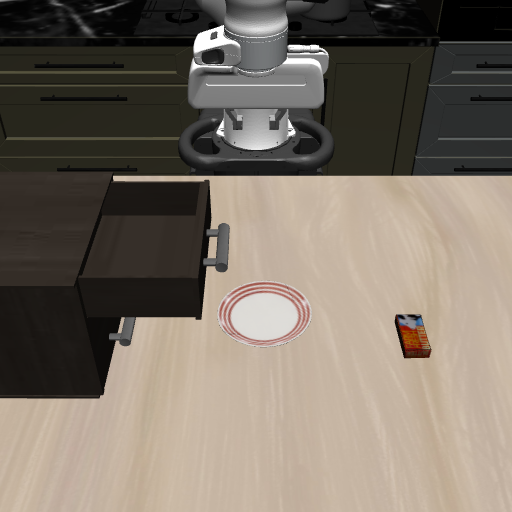

In [10]:
from libero.libero.envs import OffScreenRenderEnv
from IPython.display import display
from PIL import Image

import torch
import torchvision


env_args = {
    "bddl_file_name": bddl_file_names[0],
    "camera_heights": 512,
    "camera_widths": 512
}

env = OffScreenRenderEnv(**env_args)
obs = env.reset()
display(Image.fromarray(obs["agentview_image"][::-1]))